Regression Results
RMSE: 1481737851.4823227
R² Score: 0.6282067552488775

Classification Results
Accuracy: 0.8526315789473684


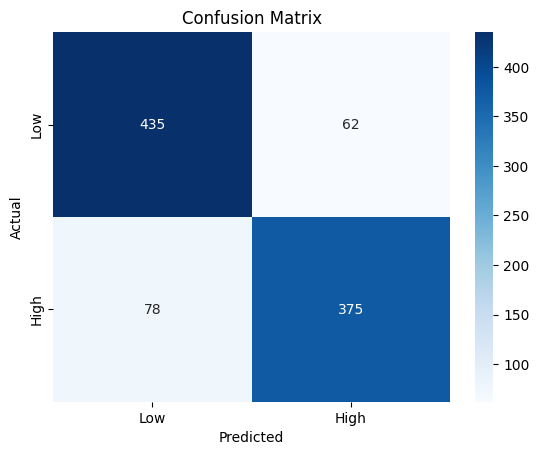


--- Enter Details for Rent Prediction ---
Enter BHK : example - 2 2
Enter Size in sqft :example - 2400 2400
Enter number of Bathrooms : example - 2 2
Enter City  : example - MumbaiMumbai
Enter Furnishing Status : example - Furnished/Semi-Furnished/Unfurnished Semi-furnished
Enter Area Type :example - (Super Area/Carpet Area/Built Area) Super Area

Predicted Rent for 2400 sqft in Mumbai: 156226.37


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import HistGradientBoostingRegressor, HistGradientBoostingClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# -------------------------
# 1. Load dataset
# -------------------------
data = pd.read_csv("House_Rent_Dataset.csv")

# -------------------------
# 2. Feature Selection
# -------------------------
features = ["BHK", "Size", "Bathroom", "City", "Furnishing Status", "Area Type"]
X = data[features]
y = data["Rent"]

# -------------------------
# 3. Train/Test Split
# -------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -------------------------
# 4. Preprocessing (OneHotEncode categorical features)
# -------------------------
categorical = ["City", "Furnishing Status", "Area Type"]
numeric = ["BHK", "Size", "Bathroom"]

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical),
        ("num", "passthrough", numeric)
    ]
)

# -------------------------
# 5. Regression Model (Lightweight & Accurate)
# -------------------------
regressor = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", HistGradientBoostingRegressor(max_depth=10, learning_rate=0.1, random_state=42))
])

regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

# -------------------------
# 6. Regression Metrics
# -------------------------
print("Regression Results")
print("RMSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

# -------------------------
# 7. Classification (High/Low Rent)
# -------------------------
threshold = data["Rent"].median()
y_test_class = ["High" if val > threshold else "Low" for val in y_test]
y_pred_class = ["High" if val > threshold else "Low" for val in y_pred]

# Use classifier for accuracy check
classifier = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", HistGradientBoostingClassifier(max_depth=10, learning_rate=0.1, random_state=42))
])

classifier.fit(X_train, ["High" if val > threshold else "Low" for val in y_train])
y_pred_class2 = classifier.predict(X_test)

print("\nClassification Results")
print("Accuracy:", accuracy_score(y_test_class, y_pred_class2))

cm = confusion_matrix(y_test_class, y_pred_class2, labels=["Low","High"])
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Low","High"], yticklabels=["Low","High"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# -------------------------
# 8. User Input for Prediction
# -------------------------
print("\n--- Enter Details for Rent Prediction ---")
bhk = int(input("Enter BHK : example - 2 "))
size = int(input("Enter Size in sqft :example - 2400 "))
bathroom = int(input("Enter number of Bathrooms : example - 2 "))
city = input("Enter City  : example - Mumbai")
furnishing = input("Enter Furnishing Status : example - Furnished/Semi-Furnished/Unfurnished ")
area_type = input("Enter Area Type :example - (Super Area/Carpet Area/Built Area) ")

sample = pd.DataFrame([[bhk, size, bathroom, city, furnishing, area_type]], columns=features)

predicted_price = regressor.predict(sample)
print(f"\nPredicted Rent for {size} sqft in {city}: {predicted_price[0]:.2f}")